In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
raw_data = pd.read_csv('spam.csv', encoding='latin1')
select_columns = ['v1', 'v2']
filter_data = raw_data[select_columns]


In [4]:
print(filter_data)


        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
#replace null values with null string

data=filter_data.where((pd.notnull(filter_data)),'')


In [6]:
data.shape

(5572, 2)

In [7]:
#labeling data as 0(for spam) and 1(for ham)

data.loc[data['v1']=='spam','v1',]=0
data.loc[data['v1']=='ham','v1',]=1


In [8]:
spam_count = data['v1'].value_counts()[0]
ham_indices = data[data['v1'] == 1].index
random_indices = np.random.choice(ham_indices, spam_count, replace=False)
balanced_indices = np.concatenate([data[data['v1'] == 0].index, random_indices])
balanced_data = data.loc[balanced_indices]


In [9]:
# Separating the data as text and label
x = balanced_data['v2']
y = balanced_data['v1']


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1494,)
(1195,)
(299,)


In [11]:
#transform the text data to feature vector used as input to svm

feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

In [12]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [13]:
model=svm.SVC()
model.fit(x_train_features,y_train)


SVC()

In [14]:
#predictipns on training data
predictions = model.predict(x_train_features)
accuracy = accuracy_score(y_train, predictions)


In [15]:
#printing the accuracy of traing data
print("Accuracy on training data is: ",accuracy)

Accuracy on training data is:  1.0


In [16]:
#predictipns on testing data
predictions_test = model.predict(x_test_features)
accuracy = accuracy_score(y_test, predictions_test)

In [17]:
#printing the accuracy on testing data
print("Accuracy on training data is: ",accuracy)


Accuracy on training data is:  0.979933110367893


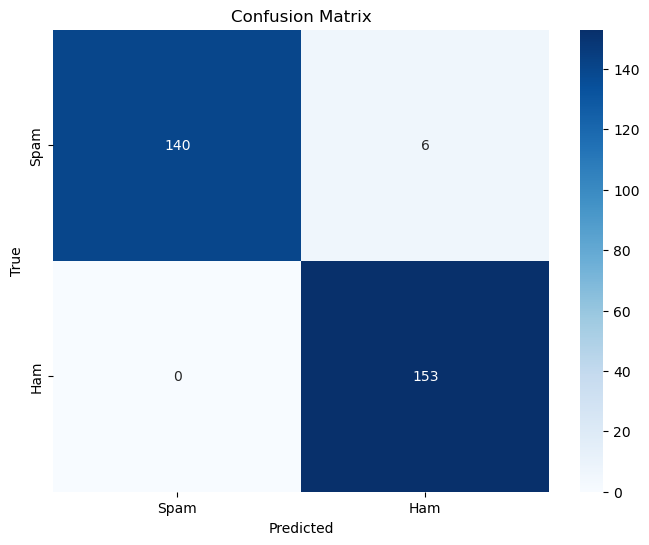

In [18]:
"""Confusion matrix and bar plot of class distribution"""

cm = confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Classification Report
print("Classification Report on testing data:\n", classification_report(y_test, predictions_test))

Classification Report on testing data:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       146
           1       0.96      1.00      0.98       153

    accuracy                           0.98       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.98      0.98      0.98       299

